# Tic-Tac-Toe AI and Data Visualization Tasks BY BESTMAN EZEKWU ENOCK
This notebook contains two tasks aimed at demonstrating practical Python programming skills for AI and data visualization using matplotlib. The tasks are divided as follows:

- Tic-Tac-Toe Game with AI
- Data Visualization using Matplotlib
Task 1: Tic-Tac-Toe AI
This task involves creating a Python program for a simple Tic-Tac-Toe game where the player competes against an AI. The AI makes random moves to challenge the player.

## Features:
Interactive Gameplay: The player chooses their moves via inputs (1-9).
AI Opponent: The AI makes its moves based on available empty cells.
Winner Detection: The program identifies when either the player or AI wins, or if the game ends in a tie.
Clean Visual Representation: A clear display of the game board after each move.

In [27]:
# install and import necessary libs
# pip install -q matplotlib pandas

import random

In [29]:
# Tic-Tac-Toe Game with a Simple AI

def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("-" * 9)

def check_winner(board):
    for row in board:
        if row[0] == row[1] == row[2] and row[0] != " ":
            return row[0]
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] and board[0][col] != " ":
            return board[0][col]
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != " ":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != " ":
        return board[0][2]
    return None

def is_full(board):
    return all(cell != " " for row in board for cell in row)

def player_move(board):
    while True:
        try:
            move = int(input("Human please enter  your move as a Real-number within range (1-9): ")) - 1
            row, col = divmod(move, 3)
            if board[row][col] == " ":
                board[row][col] = "X"
                break
            else:
                print("Cell already taken. Try again.")
        except (ValueError, IndexError):
            print("Invalid input. Sorry! Enter a number between 1 and 9.")

def ai_move(board):
    empty_cells = [(r, c) for r in range(3) for c in range(3) if board[r][c] == " "]
    row, col = random.choice(empty_cells)
    board[row][col] = "X"

def main():
    board = [[" " for _ in range(3)] for _ in range(3)]
    print("Tic-Tac-Toe: You are X, AI is O")
    print_board(board)

    while True:
        player_move(board)
        print_board(board)
        if winner := check_winner(board):
            print(f"{winner} wins!")
            break
        if is_full(board):
            print("It's a tie!")
            break

        ai_move(board)
        print("AI's move:")
        print_board(board)
        if winner := check_winner(board):
            print(f"{winner} wins!")
            break
        if is_full(board):
            print("It's a tie!")
            break

if __name__ == "__main__":
    main()


Tic-Tac-Toe: You are X, AI is O
  |   |  
---------
  |   |  
---------
  |   |  
---------


Human please enter  your move as a Real-number within range (1-9):  1


X |   |  
---------
  |   |  
---------
  |   |  
---------
AI's move:
X |   | X
---------
  |   |  
---------
  |   |  
---------


Human please enter  your move as a Real-number within range (1-9):  2


X | X | X
---------
  |   |  
---------
  |   |  
---------
X wins!


# Task 2: Data Visualization Using Matplotlib
This task focuses on data analysis and visualization using the dataset provided here. It contains two exercises:

## Exercise 1: Line Plot of Total Profit
Visualizes the company's total profit over a series of months.
The graph includes a grid and markers for better interpretation.
## Exercise 2: Subplots for Bathing Soap and Facewash Sales
Creates two subplots: one for bathing soap sales and another for facewash sales.
Both graphs have distinct colors and legends, ensuring easy understanding of the trends.

## Exercise 1: Line Plot of Total Profit

In [66]:
# Install all necesary libs for data visualisation
# pip install matplotlib pandas
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Ensure all necessary libraries (pandas, seaborn, matplotlib, and requests) are installed:

# pip install pandas seaborn matplotlib requests

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO


In [100]:

# To be used for local acess to the repository 
file_path = "/mnt/c/Users/MR-BEST/flexisafe_internship_programme/beginner_phase/"
local_filename = "company_sales_data.csv"

# Load the data
url = "https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv"

try:
    # Send a GET request with a user-agent header
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Raise an error for HTTP errors (like 403)

        # Write the content of the response to a local file
    with open(local_filename, "wb") as file:
        file.write(response.content)

    # Read the content into Pandas
    data = pd.read_csv(StringIO(response.text))
    print(data.head(3)) # Print first 3 rows
    
except requests.exceptions.RequestException as e:
    print(f"Error fetching the CSV: {e}")

    print(f"CSV file successfully downloaded and saved as '{local_filename}'")
except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")

   month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  


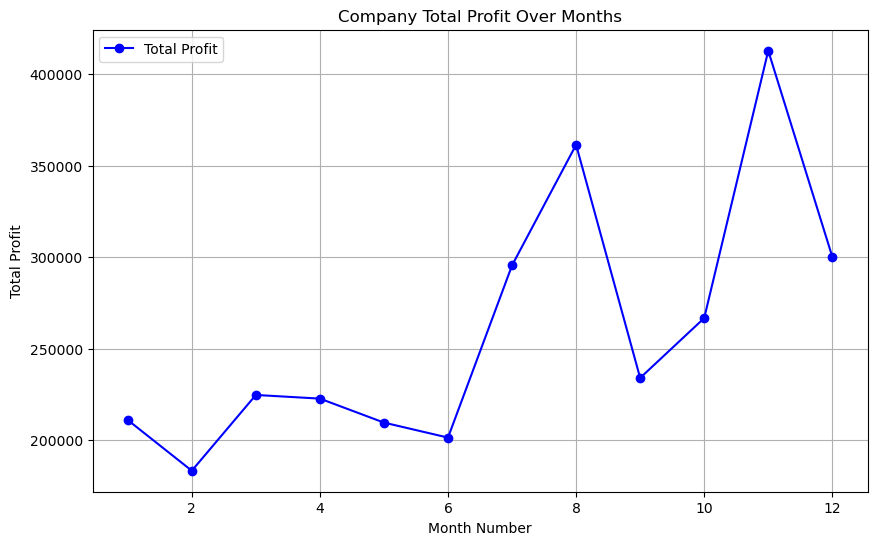

In [78]:

# Extract the 'month_number' and 'total_profit' columns
months = data['month_number']
total_profit = data['total_profit']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(months, total_profit, marker='o', color='b', label='Total Profit')
plt.title("Company Total Profit Over Months")
plt.xlabel("Month Number")
plt.ylabel("Total Profit")
plt.grid(True)
plt.legend()
plt.show()


## Exercise 2: Subplots for Bathing Soap and Facewash Sales

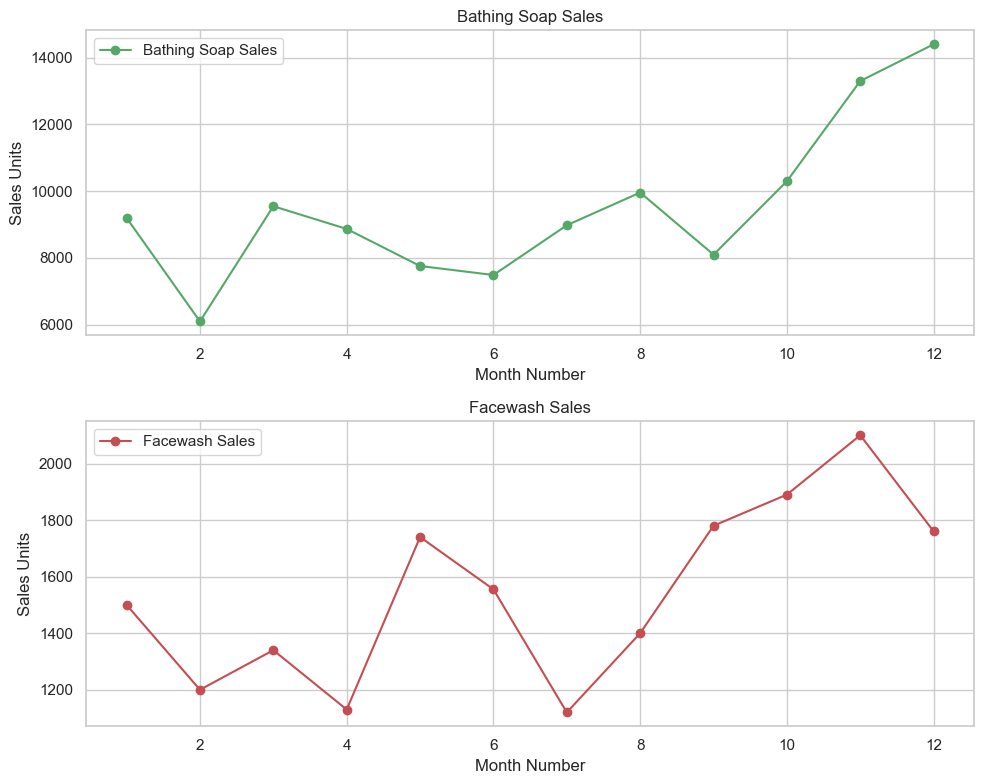

In [102]:
# Extract columns for Bathing Soap and Facewash
bathing_soap_sales = data['bathingsoap']
facewash_sales = data['facewash']

# Create subplots
plt.figure(figsize=(10, 8))

# Subplot 1: Bathing Soap Sales
plt.subplot(2, 1, 1)
plt.plot(months, bathing_soap_sales, marker='o', color='g', label='Bathing Soap Sales')
plt.title("Bathing Soap Sales")
plt.xlabel("Month Number")
plt.ylabel("Sales Units")
plt.grid(True)
plt.legend()

# Subplot 2: Facewash Sales
plt.subplot(2, 1, 2)
plt.plot(months, facewash_sales, marker='o', color='r', label='Facewash Sales')
plt.title("Facewash Sales")
plt.xlabel("Month Number")
plt.ylabel("Sales Units")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# ALTERNATIVE Implementation of Task 2 with Seaborn incorporated for better visualisation

## Task 1: Tic-Tac-Toe AI Agent
Since Seaborn is not directly relevant for the Tic-Tac-Toe task, we'll focus only on Task 2.

## Task 2: Seaborn for Data Visualization
Using Seaborn, we will:

- Create a line plot for the total profit of all months.
- Create subplots for bathing soap and facewash sales.
Here’s the code to implement these tasks:



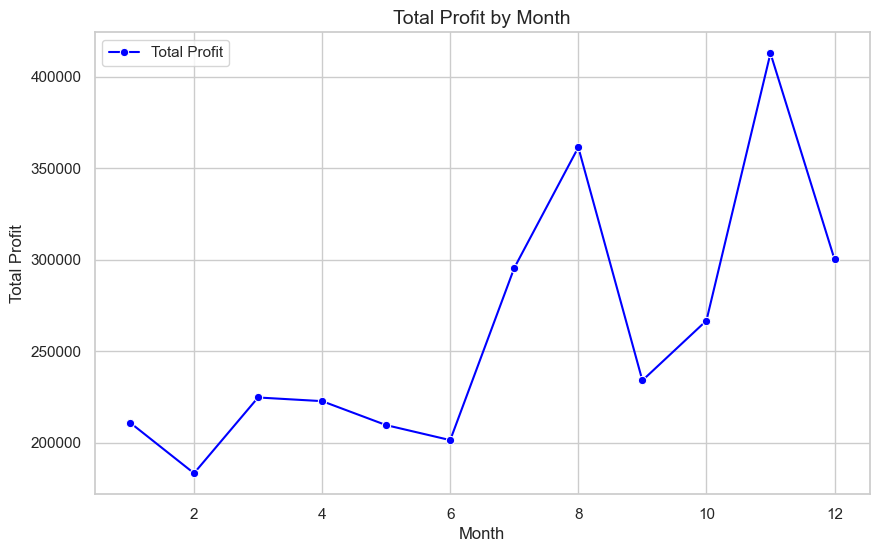

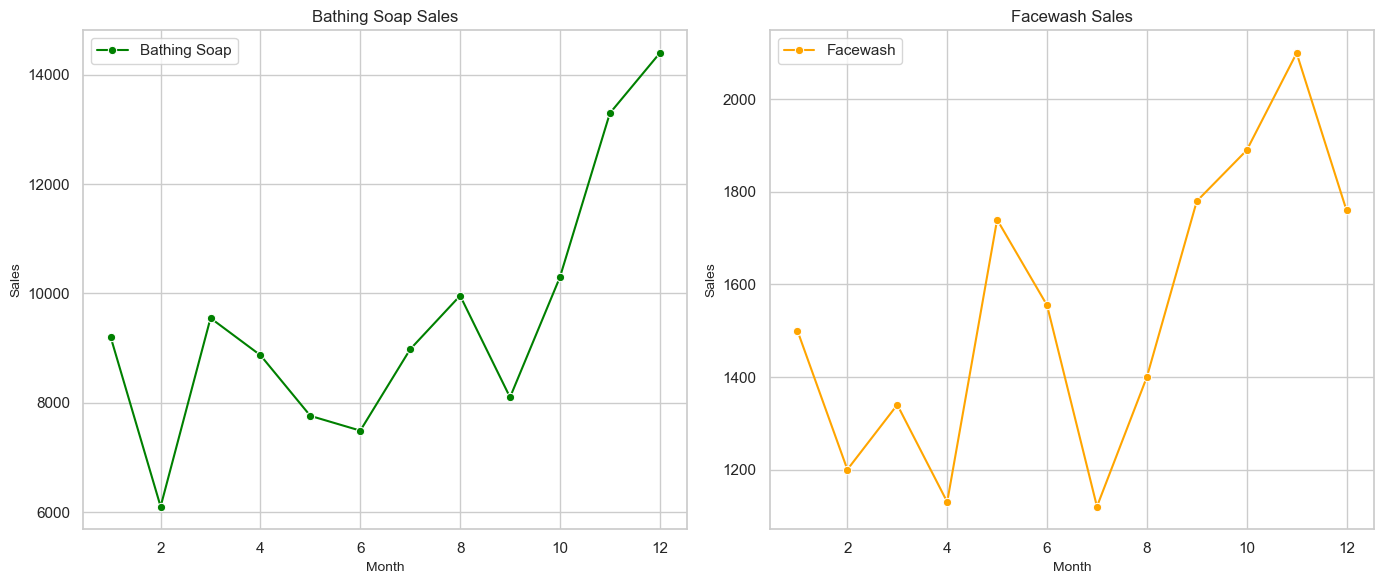

In [104]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # URL to the dataset
# url = "https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv"

# # Load the data
# data = pd.read_csv(url)

# # Display the first few rows of the dataset
# print(data.head())

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Task 2a: Line plot for total profit of all months
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='month_number', y='total_profit', marker='o', color='blue', label='Total Profit')
plt.title('Total Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend()
plt.show()

# Task 2b: Subplots for bathing soap and facewash sales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bathing soap sales
sns.lineplot(ax=axes[0], data=data, x='month_number', y='bathingsoap', marker='o', color='green', label='Bathing Soap')
axes[0].set_title('Bathing Soap Sales', fontsize=12)
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Sales', fontsize=10)

# Subplot 2: Facewash sales
sns.lineplot(ax=axes[1], data=data, x='month_number', y='facewash', marker='o', color='orange', label='Facewash')
axes[1].set_title('Facewash Sales', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Sales', fontsize=10)

# Display the subplots
plt.tight_layout()
plt.show()


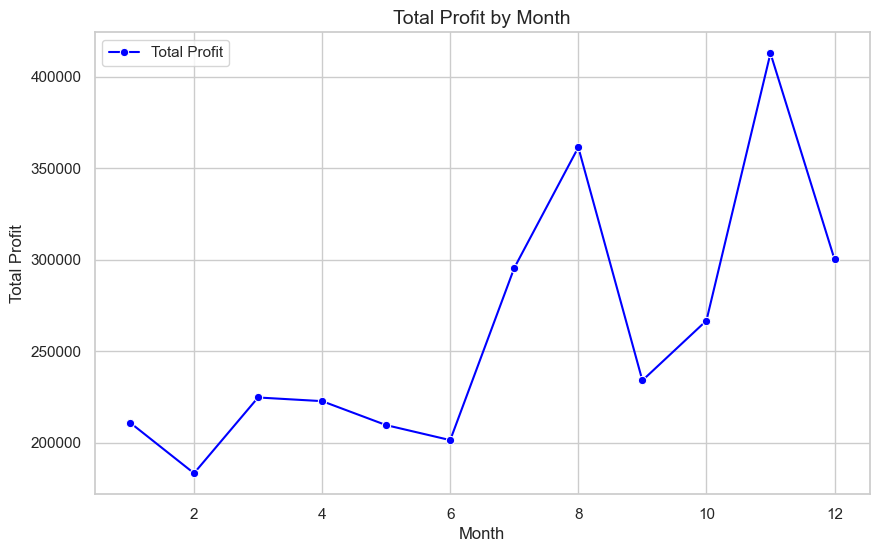

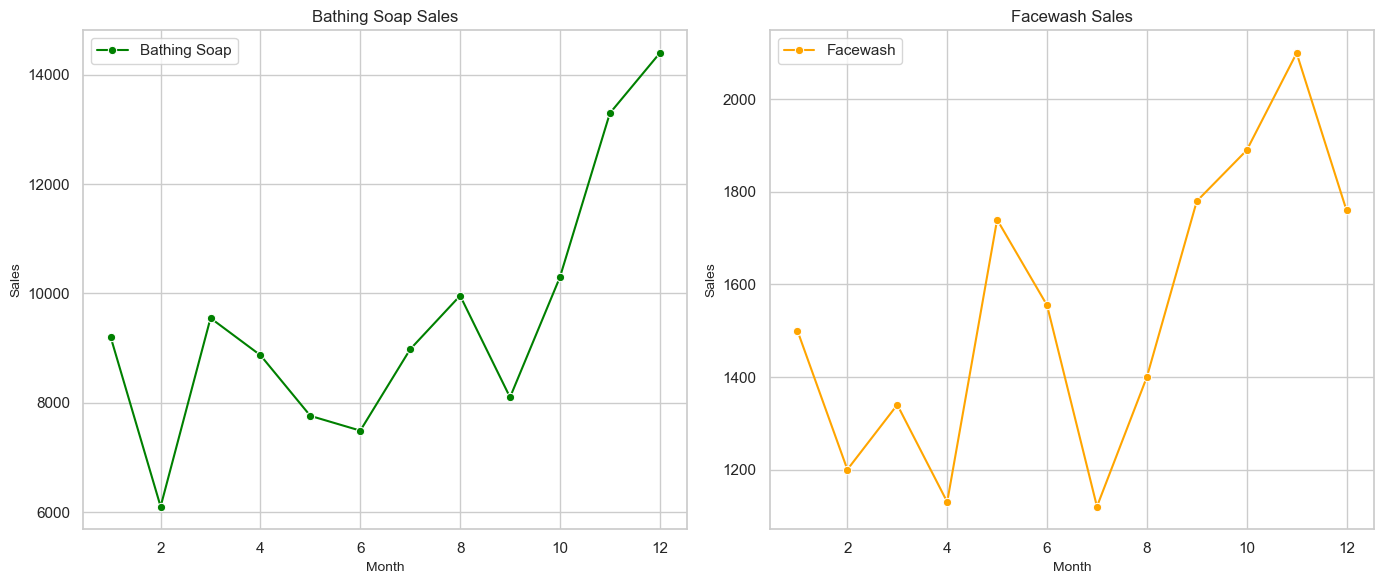

In [88]:
# URL to the dataset
# url = "https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv"

# # Load the data
# data = pd.read_csv(url)

# # Display the first few rows of the dataset
# print(data.head())

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Task 2a: Line plot for total profit of all months
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='month_number', y='total_profit', marker='o', color='blue', label='Total Profit')
plt.title('Total Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.legend()
plt.show()

# Task 2b: Subplots for bathing soap and facewash sales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Bathing soap sales
sns.lineplot(ax=axes[0], data=data, x='month_number', y='bathingsoap', marker='o', color='green', label='Bathing Soap')
axes[0].set_title('Bathing Soap Sales', fontsize=12)
axes[0].set_xlabel('Month', fontsize=10)
axes[0].set_ylabel('Sales', fontsize=10)

# Subplot 2: Facewash sales
sns.lineplot(ax=axes[1], data=data, x='month_number', y='facewash', marker='o', color='orange', label='Facewash')
axes[1].set_title('Facewash Sales', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Sales', fontsize=10)

# Display the subplots
plt.tight_layout()
plt.show()